### Polynomial Regression
When we have data that does not follow a linear trend and instead it follows a polynomial trend, we are supposed to use polynomial regression to build our model.

### Import the libraries we are going to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

### Polynomial functions and their graphs

Graph for $Y=X$

Text(0, 0.5, 'Y-Axis')

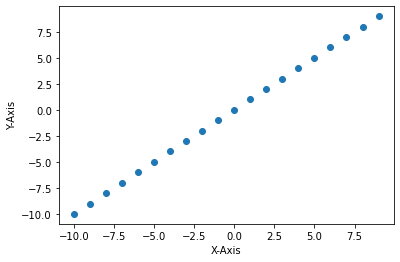

In [2]:
x = np.arange(-10, 10)
y = x
plt.scatter(x, y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

Graph for $Y = X^2$

Text(0, 0.5, 'Y-Axis')

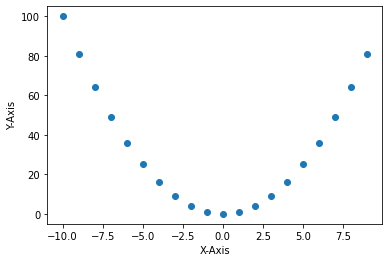

In [3]:
x = np.arange(-10, 10)
y = np.power(x, 2)
plt.scatter(x, y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

Graph for $Y = X^3$

Text(0, 0.5, 'Y-Axis')

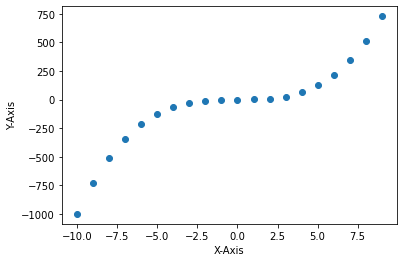

In [4]:
x = np.arange(-10, 10)
y = np.power(x, 3)
plt.scatter(x, y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

Graph with more than one polynomials $Y = X^3 + X^2 + X$

Text(0, 0.5, 'Y-Axis')

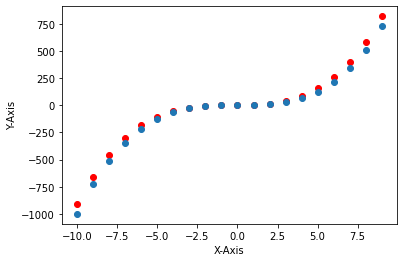

In [5]:
x = np.arange(-10, 10)
y = np.power(x, 3)
y1 = np.power(x, 3) + np.power(x, 2) + x
plt.scatter(x, y1, c="red")
plt.scatter(x, y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

In the above graph, the red dots show the graph for $Y = X^3 + X^2 + x$ and blue represent $Y = X^3$, it is evident that the most prominet power influences the shape of our praph.

### The formula for polynomial regression.

$Y = b_0 + b_1X + b_2X^2 + ... + b_nX^n $

Where 

$Y$ = output

$X$ = input feature

$b_0, b_1, b_n$ = coefficients

In the previous regression models, we used sci-kit learn library for implementation but in this example we are going to use Normal Equation to implement it (Note: It is possible to use scikit in this example also.).

The equation we are going to use is as follows.

$\theta = (X^TX)^{-1} . (X^Ty)$

In the equation above:

$\theta$ : hypothesis parameters that define it best.

$X$ : Input feature value for each instance.

$Y$ : Output value of each instance.

### Generate the data points.

Text(0, 0.5, 'Y-Axis')

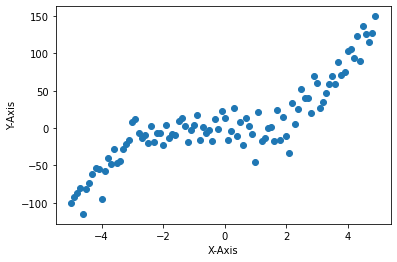

In [6]:
x = np.arange(-5, 5, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*(x) + 1

# add some noise to our data
y_noise = 15 * np.random.normal(size=len(x))
y = y + y_noise
plt.scatter(x, y)

plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

Initialize $x, x^2, x^3$ vectors:

We are taking the maximum power of $x$ as 3. So our $X$ matrix will have $X, X^2, X^3$.

In [7]:
x1 = x
x2 = np.power(x1, 2)
x3 = np.power(x1, 3)
n = len(x1)

### Reshaping data:

In [8]:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

The 1st column of the main matric $X$ will always be 1 because it holds the coefficients of beta_0.

In [9]:
x_bias = np.ones((n, 1))

### Form the complete x matrix:

Look at the matrix X at the start of this implementation, we are going to create it by appending vectors.

In [10]:
x_new = np.append(x_bias, x1_new, axis=1)
x_new = np.append(x_new, x2_new, axis=1)
x_new = np.append(x_new, x3_new, axis=1)

### Transpose the matrix

In [11]:
x_new_transpose = np.transpose(x_new)

### Matrix multiplication

In [12]:
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

### The inverse of a matrix

In [13]:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)

### Matrix multiplication

In [14]:
temp_2 = x_new_transpose.dot(y)

### Coefficient values:

In [15]:
theta = temp_1.dot(temp_2)
theta

array([-1.59573347, -0.24182371,  1.1377652 ,  1.0966124 ])

### Store the coefficients in variables.

In [16]:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

### Plot the data with curve

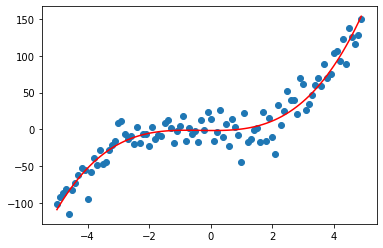

In [17]:
plt.scatter(x, y)
plt.plot(x, beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3, c="red")

### Implementing the prediction function

In [18]:
def prediction(x1, x2, x3, beta_0, beta_1, beta_2, beta_3):
    y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
    return y_pred

### Do actual prediction

In [19]:
pred = prediction(x1, x2, x3, beta_0, beta_1, beta_2, beta_3)

### Error function
Calculate the error using mean squared function

In [20]:
def err(y_pred, y):
    var = (y-y_pred)
    var = var * var
    n = len(var)
    MSE = var.sum()
    MSE = MSE / n
    
    return MSE

In [21]:
error = err(pred, y)
error

251.50664447704509